# Single-Cell Comparisons and Analysis

## Packages

In [58]:
import re
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Versions
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.2 scipy==1.7.1 pandas==1.3.2 scikit-learn==0.24.2 statsmodels==0.13.5 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.8


## Input Data

In [3]:
# Reading in Data
adata = sc.read_h5ad('../04.ClusterAnnotation/study1_filt_clust_anno.h5ad')

In [4]:
adata.obs

,sample,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,louvain,Group,Drug,Dose,Description,ann_cluster0,ann_cluster,ann_cluster2,MuratLabels
AAACCCAAGGTGATCG-1-0,G1_1,0,1129,1129,1820.0,78.0,4.285715,0,2,Vehicle,Vehicle,NaN,Vehicle,Spermatids,Spermatids,Spermatids,Round_spermatids
AAACCCACAGACCAGA-1-0,G1_1,0,2627,2627,5715.0,801.0,14.015748,8,9,Vehicle,Vehicle,NaN,Vehicle,Leydig,Leydig,Leydig,Leydig
AAACCCACATGTCAGT-1-0,G1_1,0,2621,2621,6592.0,202.0,3.064320,8,9,Vehicle,Vehicle,NaN,Vehicle,Leydig,Leydig,Leydig,Leydig
AAACCCAGTAAGAACT-1-0,G1_1,0,834,834,1216.0,105.0,8.634869,19,2,Vehicle,Vehicle,NaN,Vehicle,Leydig,Leydig,Leydig,Leydig
AAACCCAGTATGTCCA-1-0,G1_1,0,1040,1040,1623.0,109.0,6.715958,2,2,Vehicle,Vehicle,NaN,Vehicle,Spermatocytes,Undt: Spermatocytes,Undt: Spermatocytes,Spermatogonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTCCACTG-1-11,G7_2,11,980,980,1226.0,55.0,4.486134,9,8,Chall_Cpd2,Chall_Cpd2,High,Chall_Cpd2_QD_oral_gavage,Spermatids,Eln Spermatids,Eln Spermatids,Elongated_spermatids
TTTGTTGAGGCGACAT-1-11,G7_2,11,1079,1078,1528.0,46.0,3.010471,7,7,Chall_Cpd2,Chall_Cpd2,High,Chall_Cpd2_QD_oral_gavage,Mixed Somatic,Mixed Somatic,Mixed Somatic,Other_somatic
TTTGTTGGTGGATCAG-1-11,G7_2,11,2320,2320,3415.0,83.0,2.430454,13,3,Chall_Cpd2,Chall_Cpd2,High,Chall_Cpd2_QD_oral_gavage,Mixed Germ,Mixed Germ,Mixed Germ,Spermatocytes
TTTGTTGGTGGCCCAT-1-11,G7_2,11,929,929,1292.0,42.0,3.250774,2,0,Chall_Cpd2,Chall_Cpd2,High,Chall_Cpd2_QD_oral_gavage,Spermatocytes,Undt: Spermatocytes,Undt: Spermatocytes,Spermatogonia


In [5]:
# Reading in Metadata
meta = pd.read_csv('../03.CellFiltering/sample_anno.csv',sep=',',index_col=0)
meta

,Group,Drug,Dose,Description
Sample,,,,
G1_1,Vehicle,Vehicle,NaN,Vehicle
G1_3,Vehicle,Vehicle,NaN,Vehicle
G2_1,Challenge,Challenge,High,Challenge
G2_2,Challenge,Challenge,High,Challenge
G3_1,Chall_RefTrtLow,Chall_RefTrt,HighLow,Chall_Low_Ref_Trt_daily_sc_injection
G3_2,Chall_RefTrtLow,Chall_RefTrt,HighLow,Chall_Low_Ref_Trt_daily_sc_injection
G4_1,Chall_RefTrtHigh,Chall_RefTrt,HighHigh,Chall_High_Ref_Trt_daily_sc_injection
G4_2,Chall_RefTrtHigh,Chall_RefTrt,HighHigh,Chall_High_Ref_Trt_daily_sc_injection
G5_1,Chall_Cpd1,Chall_Cpd1,High,Chall_Cpd1_BID_oral_gavage


## DEGs and Background

In [9]:
# Overall DEGs and Background
def findTreatmentDEgenes(adata,meta,celltype,ref,prefix=''):
    if not 'base' in adata.uns['log1p']:
        adata.uns['log1p']['base'] = None
    
    # Subsetting for Cell Type
    adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]

    adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])        
    treatment_groups = list(meta['Group'].unique())
    treatment_groups.remove(ref)
    sc.tl.rank_genes_groups(adata,'Group',groups=treatment_groups,reference=ref,method='wilcoxon',pts=True,key_added=celltype)

    array1 = []
    array2 = []
    for i in range(len(adata.uns[celltype]['names'][0])):
        index = list(map(lambda x: x[i],adata.uns[celltype]['names']))
        score = pd.Series(map(lambda x: x[i],adata.uns[celltype]['scores']),index=index,name='scores')
        logfc = pd.Series(map(lambda x: x[i],adata.uns[celltype]['logfoldchanges']),index=index,name='logFC')
        pv = pd.Series(map(lambda x: x[i],adata.uns[celltype]['pvals_adj']),index=index,name='pvals_adj')
        markers0 = pd.concat([score,logfc,pv],join='inner',axis=1)
        markers1 = markers0[markers0['logFC']>0.8].head(n=200)
        markers1['comparison'] = [treatment_groups[i]] * markers1.shape[0]
        markers2 = markers0[markers0['logFC']<-.8].tail(n=200)
        markers2['comparison'] = [treatment_groups[i]] * markers2.shape[0]
        array1.append(markers1)
        array2.append(markers2.iloc[::-1,:])
    
    if prefix != '':
        prefix = prefix + '.'
    markersUp = pd.concat(array1,join='inner',axis=0)
    markersDown = pd.concat(array2,join='inner',axis=0)
    markersUp.to_csv('DEA/%s/%sscanpy.%s.DEgenes.up.csv' % (celltype,prefix,celltype))
    markersDown.to_csv('DEA/%s/%sscanpy.%s.DEgenes.down.csv' % (celltype,prefix,celltype))
    adata.uns[celltype]['pts'].to_csv('DEA/%s/%sscanpy.%s.marker.pts.csv' % (celltype,prefix,celltype))

# Example
# findTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',ref='Vehicle')

#### Sertoli

In [10]:
# DE: Challenge vs Vehicle for Sertoli
    # Keep Challenge and Vehicle
gdata = adata[adata.obs.loc[adata.obs.Group.isin(['Challenge','Vehicle'])].index.tolist(), ]
gmeta = meta.loc[meta['Group'].isin(['Challenge','Vehicle'])]

findTreatmentDEgenes(adata=gdata,meta=gmeta,celltype='Sertoli',ref='Vehicle',prefix='Chall-vs-Veh')

# DE: All vs Challenge for Sertoli
    # Remove Vehicle
gdata = adata[adata.obs.loc[~adata.obs.Group.isin(['Vehicle'])].index.tolist(), ]
gmeta = meta.loc[meta['Group'] != 'Vehicle']
#gmeta = meta.loc[~meta['Group'].isin(['Vehicle'])] # this should also work to remove vehicle (~ inverts)

findTreatmentDEgenes(adata=gdata,meta=gmeta,celltype='Sertoli',ref='Challenge',prefix='Group-vs-Chall')

del gdata
del gmeta

/tmp/ipykernel_117507/1242666216.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


#### Leydig

In [11]:
# DE: Challenge vs Vehicle for Leydig
    # Keep Challenge and Vehicle
gdata = adata[adata.obs.loc[adata.obs.Group.isin(['Challenge','Vehicle'])].index.tolist(), ]
gmeta = meta.loc[meta['Group'].isin(['Challenge','Vehicle'])]

findTreatmentDEgenes(adata=gdata,meta=gmeta,celltype='Leydig',ref='Vehicle',prefix='Chall-vs-Veh')

# DE: All vs Challenge for Leydig
    # Remove Vehicle
gdata = adata[adata.obs.loc[~adata.obs.Group.isin(['Vehicle'])].index.tolist(), ]
gmeta = meta.loc[meta['Group'] != 'Vehicle']
#gmeta = meta.loc[~meta['Group'].isin(['Vehicle'])] # this should also work to remove vehicle (~ inverts)

findTreatmentDEgenes(adata=gdata,meta=gmeta,celltype='Leydig',ref='Challenge',prefix='Group-vs-Chall')

del gdata
del gmeta

/tmp/ipykernel_117507/1242666216.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Leydig']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
ranking genes
    finished: added to `.uns['Leydig']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:11)


## DE Files for Specific Comparisons

In [12]:
# Volcano Plot, DE file for Scatterplots
    # Significant: -logP>2 and abs(logFC)>1
def plotTreatmentDEgenes(adata,meta,celltype,control,treatment,prefix):
    if not 'base' in adata.uns['log1p']:
        adata.uns['log1p']['base'] = None
    
    # Subsetting for Cell Type
    adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]
    
    adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])        
    comparison = treatment + '_vs_' + control
    sc.tl.rank_genes_groups(adata,'Group',groups=[treatment],reference=control,method='wilcoxon',pts=False,key_added=celltype)

    index = list(map(lambda x: x[0],adata.uns[celltype]['names']))
    logfc = pd.Series(map(lambda x: x[0],adata.uns[celltype]['logfoldchanges']),index=index,name='logFC')
    pv = pd.Series(map(lambda x: x[0],adata.uns[celltype]['pvals_adj']),index=index,name='pvals_adj')
    markers = pd.concat([logfc,pv],join='inner',axis=1)
    pcts = pd.read_csv('DEA/%s/%s.scanpy.%s.marker.pts.csv' % (celltype,prefix,celltype),index_col=0)
    #only keep genes that are expressed in >10% of the cells in either condition
    geneList = list(pcts[(pcts[control]>.1) | (pcts[treatment]>.1)].index)
    markers = markers.loc[map(lambda x: x in geneList,markers.index),:]
    from pybiomart import Dataset
    dataset = Dataset(name='mmusculus_gene_ensembl',host='http://www.ensembl.org')
    names = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])
    names.index = names['Gene name']
    names = names[~names.index.duplicated()]
    markers = pd.concat([markers,names.drop('Gene name',axis=1)],join='inner',axis=1)
    markers['-logP'] = markers.apply(lambda x: -np.log10(x['pvals_adj']) if x['pvals_adj']>0 else 320,axis=1)
    markers['significant'] = markers.apply(lambda x: x['-logP']>2 and abs(x['logFC'])>1,axis=1)
    markers.drop('-logP',axis=1).to_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comparison))
    markers = markers[(markers['logFC']>-10) & (markers['logFC']<10)]
    sig = markers[(markers['-logP']>10) & ((markers['logFC']>2) | (markers['logFC']<-2))]

#### Sertoli

In [13]:
# Challenge-vs-Vehicle: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',control='Vehicle',treatment='Challenge',prefix='Chall-vs-Veh')

# Chall_RefTrtLow-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',control='Challenge',treatment='Chall_RefTrtLow',prefix='Group-vs-Chall')

# Chall_RefTrtHigh-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',control='Challenge',treatment='Chall_RefTrtHigh',prefix='Group-vs-Chall')

# Chall_Cpd2-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',control='Challenge',treatment='Chall_Cpd2',prefix='Group-vs-Chall')

# Chall_Cpd1-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Sertoli',control='Challenge',treatment='Chall_Cpd1',prefix='Group-vs-Chall')

/tmp/ipykernel_117507/1113849587.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/tmp/ipykernel_117507/1113849587.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals

#### Leydig

In [14]:
# Challenge-vs-Vehicle: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Leydig',control='Vehicle',treatment='Challenge',prefix='Chall-vs-Veh')

# Chall_RefTrtLow-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Leydig',control='Challenge',treatment='Chall_RefTrtLow',prefix='Group-vs-Chall')

# Chall_RefTrtHigh-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Leydig',control='Challenge',treatment='Chall_RefTrtHigh',prefix='Group-vs-Chall')

# Chall_Cpd2-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Leydig',control='Challenge',treatment='Chall_Cpd2',prefix='Group-vs-Chall')

# Chall_Cpd1-vs-Challenge: Volcano Plot, DE file
plotTreatmentDEgenes(adata=adata,meta=meta,celltype='Leydig',control='Challenge',treatment='Chall_Cpd1',prefix='Group-vs-Chall')

/tmp/ipykernel_117507/1113849587.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Leydig']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
ranking genes
    finished: added to `.uns['Leydig']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)
ranking genes
    finished: added to `.uns['Leydig']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', 

## DEG Scatterplots

In [15]:
# Comparison Scatterplots, Revised
    # Labels not fixed, need to only label reverse
def compareFoldChange2(celltype,comp1,comp2,sigsonly=True,xlim=(-5,5),ylim=(-5,5),
                       save=False,labels=False,genelist=False,ensembl=False,exportgenelist=False):
    # Read in Data
    df1 = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp1),index_col=0)
    df2 = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp2),index_col=0)
    
    if ensembl:
        df1 = df1.reset_index()
        df1 = df1.set_index('Gene stable ID')
        df2 = df2.reset_index()
        df2 = df2.set_index('Gene stable ID')
        
    if sigsonly:
        genes = set(list(df1[df1['significant']].index) + list(df2[df2['significant']].index))
    df = pd.concat([df1['logFC'],df2['logFC'],df1['significant'],df2['significant']],join='inner',axis=1)
    df.columns = [comp1,comp2,'sig1','sig2']
    if sigsonly:
        df = df.loc[map(lambda x: x in genes,df.index),:]
        
    # Reversed Marks
    df['Mark'] = df.apply(lambda x: 'Reversed' if x['sig1'] and x['sig2'] and ((x[comp1]>0 and x[comp2]<0) | (x[comp1]<0 and x[comp2]>0)) else '',axis=1)

    # Gene List
    if genelist:
        rev = list(df.index[df['Mark'] == 'Reversed'])
        rev = ','.join(rev)
        print(rev)
        if exportgenelist:
            textfile = open('%s.%s_VS_%s.reversed.txt' % (celltype,comp1,comp2), "w")
            textfile.write(rev+'\n')
            textfile.close()

    
    fig,ax = plt.subplots(figsize=(12,9))
    sns.set(font_scale=1.2,context='talk')
    colors = {'Reversed': 'red', '': 'darkgrey'}
    #df['colors'] = df['Mark'].map(colors)
    xlabel = comp1.replace('_', ' ') + ' (LogFC)'
    ylabel = comp2.replace('_', ' ') + ' (LogFC)'
    
    sns.scatterplot(x=comp1,y=comp2,hue='Mark',data=df,s=150,linewidth=1.5,palette=colors,ax=ax)
    #palette=['darkgrey','red']
    ax.axline((0,0),slope=-1,color='red',ls='--',lw=2,zorder=0)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    rev = list(df.index[df['Mark'] == 'Reversed'])
    if labels and rev:
        from adjustText import adjust_text
        texts = []
        for label,x,y in zip(list(df.index[df['Mark'] == 'Reversed']),df[comp1][df['Mark'] == 'Reversed'],df[comp2][df['Mark'] == 'Reversed']):
            texts.append(plt.text(x,y,label,ha='center',size=14))
        adjust_text(texts,autoalign='xy',arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='r', lw=0.5, alpha=0.8))
    
    if save:
        plt.savefig('Scatterplot/%s/%s.%s_VS_%s.scatter.png' % (celltype,celltype,comp1,comp2))
        plt.close()

#### Sertoli

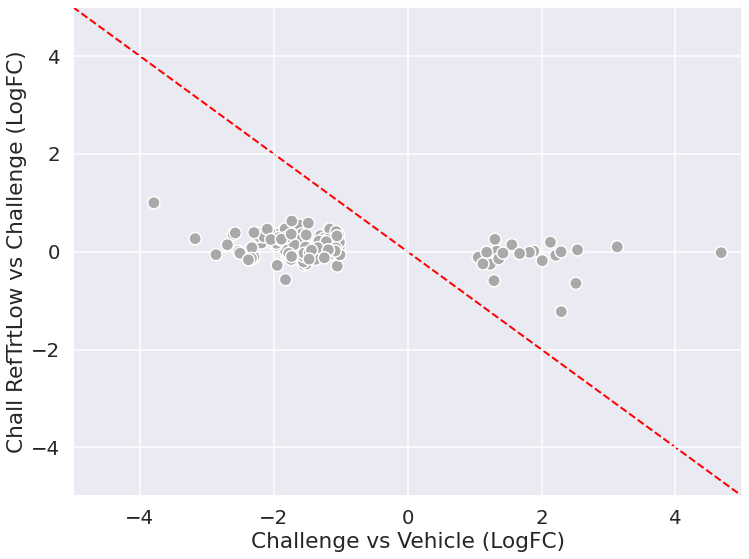

In [66]:
# Chall_RefTrtLow-vs-Challenge vs Challenge_vs_Vehicle in Sertoli: Scatterplot
compareFoldChange2(celltype='Sertoli',comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtLow_vs_Challenge',
                   sigsonly=True,xlim=(-5,5),ylim=(-5,5),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

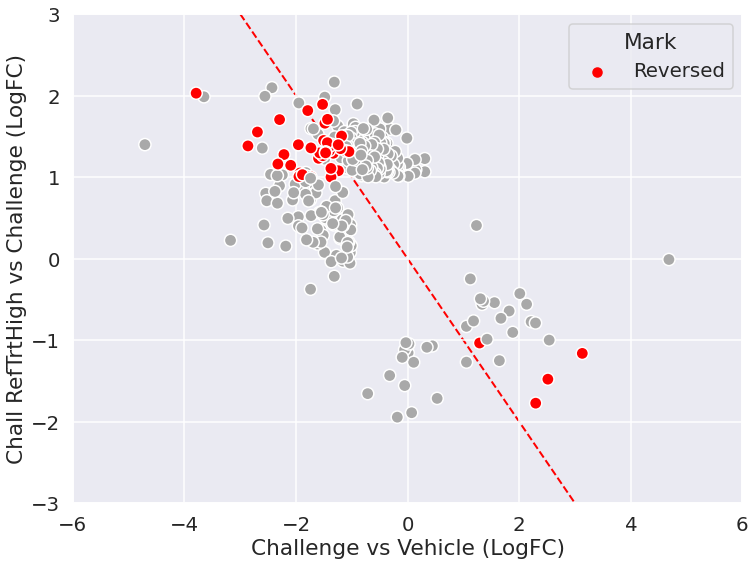

In [67]:
# Chall_RefTrtHigh-vs-Challenge vs Challenge_vs_Vehicle in Sertoli: Scatterplot
compareFoldChange2(celltype='Sertoli',comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtHigh_vs_Challenge',
                   sigsonly=True,xlim=(-6,6),ylim=(-3,3),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

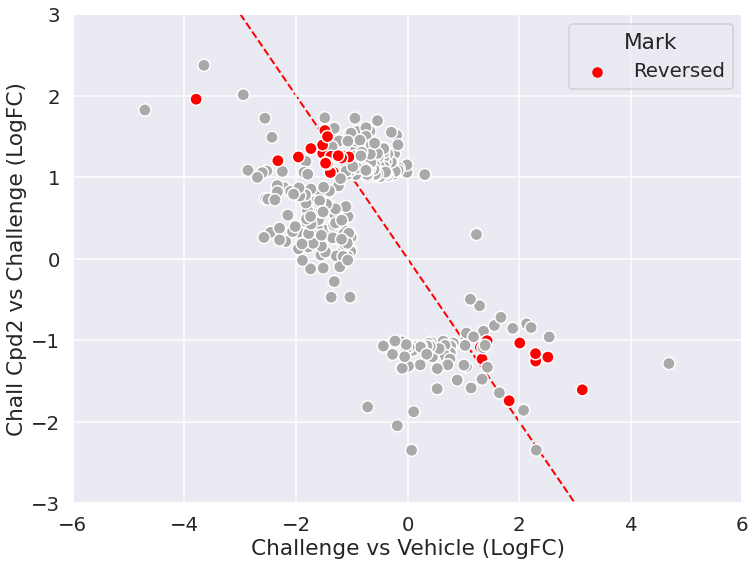

In [68]:
# Chall_Cpd2-vs-Challenge vs Challenge_vs_Vehicle in Sertoli: Scatterplot
compareFoldChange2(celltype='Sertoli',comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd2_vs_Challenge',
                   sigsonly=True,xlim=(-6,6),ylim=(-3,3),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

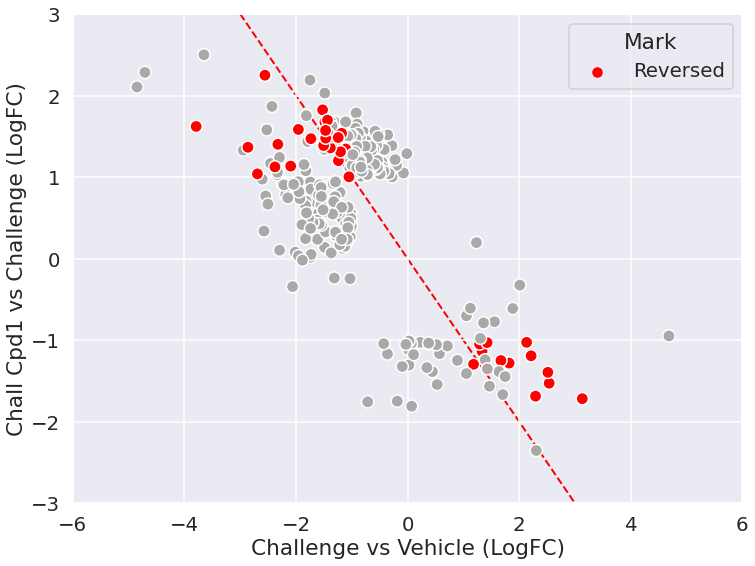

In [69]:
# Chall_Cpd1-vs-Challenge vs Challenge_vs_Vehicle in Sertoli: Scatterplot
compareFoldChange2(celltype='Sertoli',comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd1_vs_Challenge',
                   sigsonly=True,xlim=(-6,6),ylim=(-3,3),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

#### Leydig

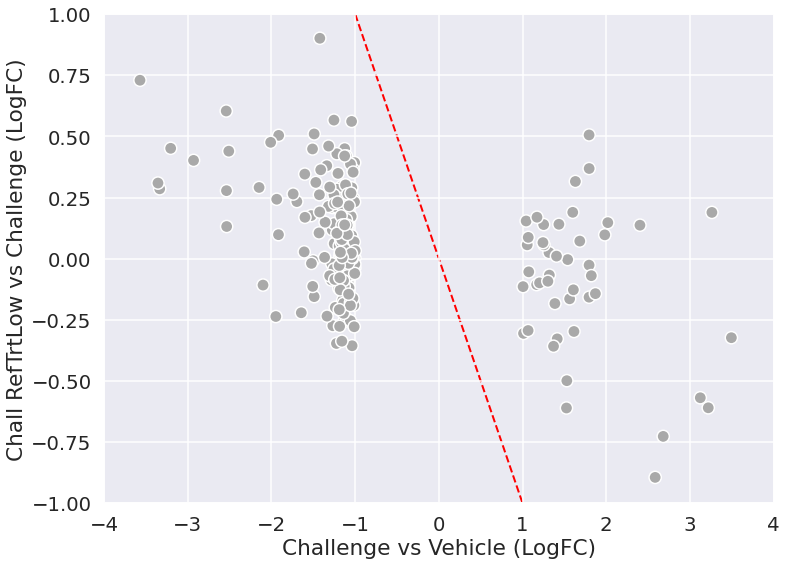

In [70]:
# Chall_RefTrtLow-vs-Challenge vs Challenge_vs_Vehicle in Leydig: Scatterplot
compareFoldChange2(celltype='Leydig',comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtLow_vs_Challenge',
                   sigsonly=True,xlim=(-4,4),ylim=(-1,1),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

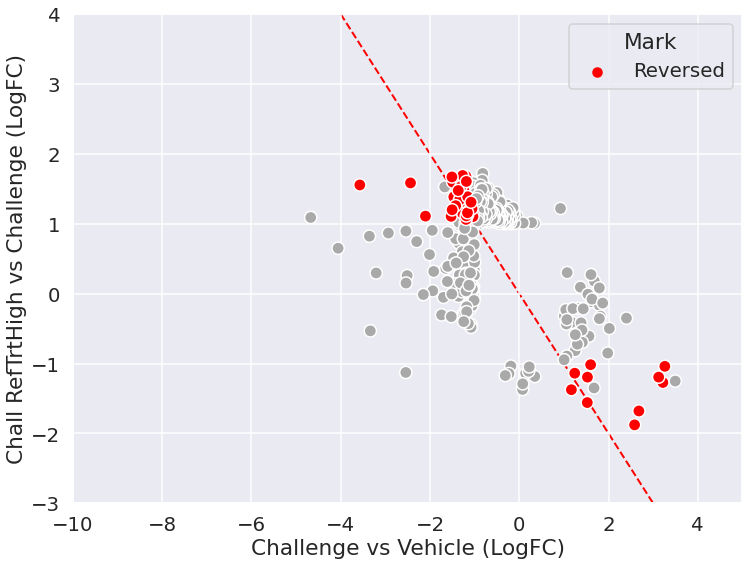

In [71]:
# Chall_RefTrtHigh-vs-Challenge vs Challenge_vs_Vehicle in Leydig: Scatterplot
compareFoldChange2(celltype='Leydig',comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtHigh_vs_Challenge',
                   sigsonly=True,xlim=(-10,5),ylim=(-3,4),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

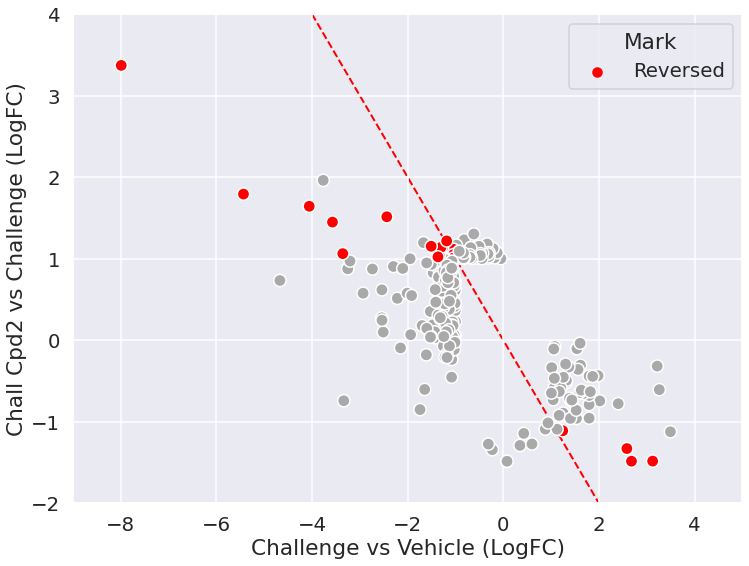

In [72]:
# Chall_Cpd2-vs-Challenge vs Challenge_vs_Vehicle in Leydig: Scatterplot
compareFoldChange2(celltype='Leydig',comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd2_vs_Challenge',
                   sigsonly=True,xlim=(-9,5),ylim=(-2,4),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

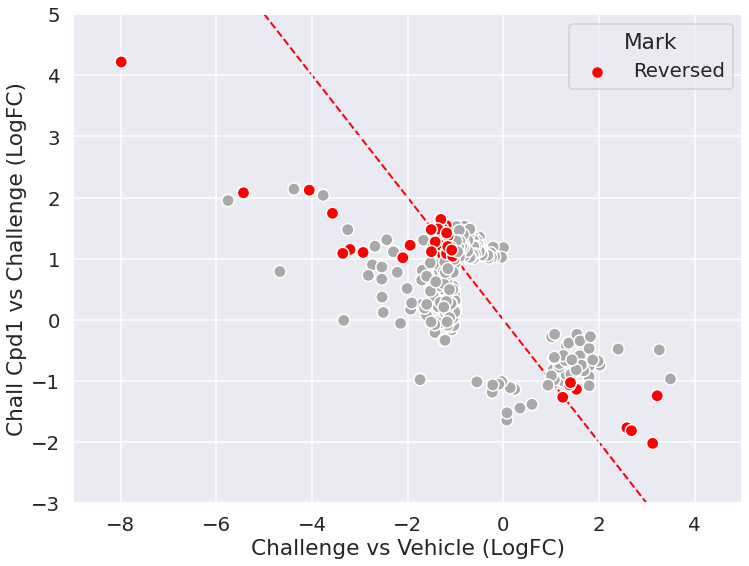

In [73]:
# Chall_Cpd1-vs-Challenge vs Challenge_vs_Vehicle in Leydig: Scatterplot
compareFoldChange2(celltype='Leydig',comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd1_vs_Challenge',
                   sigsonly=True,xlim=(-9,5),ylim=(-3,5),save=False,labels=False,genelist=False,
                   ensembl=False,exportgenelist=False)

## Web Pathway Analysis Input Files

In [24]:
# Create Gene Lists for Pathway Analysis Webtools
def geneList(comp1,comp2,up1=True,down1=True,up2=True,down2=True,celltype='',ensembl=True):
    
    # Comparison 1
    if comp1:
        df1 = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp1),index_col=0)
        if ensembl:
            df1 = df1.reset_index()
            df1 = df1.set_index('Gene stable ID')
        if up1:
            comp1up = df1.loc[(df1['significant']==True) & (df1['logFC']>0)].index.tolist()
            comp1up = ','.join(comp1up)
        if down1:
            comp1down = df1.loc[(df1['significant']==True) & (df1['logFC']<0)].index.tolist()
            comp1down = ','.join(comp1down)
    
    # Comparison 2
    if comp2:
        df2 = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp2),index_col=0)
        if ensembl:
            df2 = df2.reset_index()
            df2 = df2.set_index('Gene stable ID')
        if up2:
            comp2up = df2.loc[(df2['significant']==True) & (df2['logFC']>0)].index.tolist()
            comp2up = ','.join(comp2up)
        if down2:
            comp2down = df2.loc[(df2['significant']==True) & (df2['logFC']<0)].index.tolist()
            comp2down = ','.join(comp2down)
    
    # Background
    if comp1 and comp2:
        background = list(set(df1.index.tolist() + df2.index.tolist()))
    elif comp1:
        background = list(df1.index.tolist())
    elif comp2:
        background = list(df2.index.tolist())
    background = ','.join(background)
    
    # Writing to File
    textfile = open('PathwayAnalysis/Webtools/%s/%s.%s_and_%s.forWeb.txt' % (celltype,celltype,comp1,comp2), "w")
    if comp1:
        if up1:
            textfile.write(comp1+'-Up[c=#7b3294]'+'\t'+comp1up+'\n')
        if down1:
            textfile.write(comp1+'-Down[c=#008837]'+'\t'+comp1down+'\n')
    if comp2:
        if up2:
            textfile.write(comp2+'-Up[c=#e41a1c]'+'\t'+comp2up+'\n')
        if down2:
            textfile.write(comp2+'-Down[c=#377eb8]'+'\t'+comp2down+'\n')
    textfile.write('_BACKGROUND'+'\t'+background+'\n')
    textfile.close()

#### Sertoli

In [26]:
# Webtools: Two-Comparison Up-down Gene Lists
geneList(comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtLow_vs_Challenge',celltype='Sertoli',ensembl=True)
geneList(comp1='Challenge_vs_Vehicle',comp2='Chall_RefTrtHigh_vs_Challenge',celltype='Sertoli',ensembl=True)
geneList(comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd2_vs_Challenge',celltype='Sertoli',ensembl=True)
geneList(comp1='Challenge_vs_Vehicle',comp2='Chall_Cpd1_vs_Challenge',celltype='Sertoli',ensembl=True)

## Pipeline Significance Files

In [27]:
# Create Significance files for pipeline Pathway Analysis
def getDESigs(comps=[],celltype='',prefix='',ensembl=True):
    
    ensemblcolname = 'Gene stable ID'
    genedesigs = pd.DataFrame()

    for comp in comps:
        df = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp),index_col=0)
        df.index.name = 'GeneSymbol'
        if ensembl:
            df = df.reset_index()
            df = df.set_index(ensemblcolname)
        df.loc[(df['significant']==True) & (df['logFC']>0), 'significant'] = 1
        df.loc[(df['significant']==True) & (df['logFC']<0), 'significant'] = -1
        df.loc[df['significant']==False, 'significant'] = 0
        df = df.rename(columns={'significant': comp})
        #print(df)
        # Add Sigs column to the data frame on 'Gene stable ID'
        genedesigs = pd.concat([genedesigs, df[[comp]]], axis=1)
    #genedesigs = genedesigs.rename(columns={ensemblcolname: 'Gene'})
    genedesigs = genedesigs.rename_axis('Gene')
    genedesigs = genedesigs.fillna(0)
    #print(genedesigs.head(10))
    
    # Writing to File
    genedesigs.to_csv('PathwayAnalysis/Pipeline/%s.%sgeneSignificance.txt' % (celltype,prefix), sep='\t')

#### Sertoli

In [28]:
# Sertoli geneSignificance.txt
complist = ['Challenge_vs_Vehicle',
            'Chall_Cpd2_vs_Challenge',
            'Chall_RefTrtHigh_vs_Challenge',
            'Chall_RefTrtLow_vs_Challenge',
            'Chall_Cpd1_vs_Challenge']
getDESigs(comps=complist,celltype='Sertoli',ensembl=True)
getDESigs(comps=complist,celltype='Sertoli',prefix='symbol.',ensembl=False)


#### Leydig

In [29]:
# Leydig geneSignificance.txt
complist = ['Challenge_vs_Vehicle',
            'Chall_Cpd2_vs_Challenge',
            'Chall_RefTrtHigh_vs_Challenge',
            'Chall_RefTrtLow_vs_Challenge',
            'Chall_Cpd1_vs_Challenge']
getDESigs(comps=complist,celltype='Leydig',ensembl=True)
getDESigs(comps=complist,celltype='Leydig',prefix='symbol.',ensembl=False)

## Pipeline Merged Files

In [30]:
# Create Merged files for Excel Viewing
def getDEMerged(comps=[],celltype='',prefix=''):
    
    # Initialize
    ensemblcolname = 'Gene stable ID'
    genedesigs = pd.DataFrame()
    
    # Fill DataFrame from Comparison DE Files
    for comp in comps:
        df = pd.read_csv('DEA/%s/scanpy.%s.DE.%s.csv' % (celltype,celltype,comp),index_col=0)
        df.index.name = 'gene_name'
        df = df.reset_index()
        df = df.set_index(ensemblcolname)
        
        df.loc[(df['significant']==True) & (df['logFC']>0), 'significant'] = 1
        df.loc[(df['significant']==True) & (df['logFC']<0), 'significant'] = -1
        df.loc[df['significant']==False, 'significant'] = 0
        df = df.rename(columns={'logFC': 'Log2FC %s' % comp,
                                'pvals_adj': 'BH adjusted p-values',
                                'significant': 'Significance: Abs(Log2FC)>=1 BHP<0.01'})
        df = df.drop(columns=['gene_name'])
        genedesigs = pd.concat([genedesigs, df], axis=1)
    genedesigs = genedesigs.rename_axis('Gene')
    genedesigs = genedesigs.fillna(0)
    
    # Adding Gene Symbol Column
    from pybiomart import Dataset
    dataset = Dataset(name='mmusculus_gene_ensembl',host='http://www.ensembl.org')
    names = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])
    names.index = names['Gene stable ID']
    names = names[~names.index.duplicated()]
    genedesigs = pd.concat([genedesigs,names.drop('Gene stable ID',axis=1)],join='inner',axis=1)
    genedesigs = genedesigs.rename(columns={'Gene name': 'gene_name'})
    genedesigs = genedesigs.rename_axis('Gene')
    
    # Writing to File
    genedesigs.to_csv('%s.%sgeneMerged.txt' % (celltype,prefix), sep='\t')

#### Sertoli

In [31]:
# Sertoli geneMerged.txt
complist = ['Challenge_vs_Vehicle',
            'Chall_Cpd2_vs_Challenge',
            'Chall_RefTrtHigh_vs_Challenge',
            'Chall_RefTrtLow_vs_Challenge',
            'Chall_Cpd1_vs_Challenge']
getDEMerged(comps=complist,celltype='Sertoli',prefix='')

#### Leydig

In [32]:
# Leydig geneEMerged.txt
complist = ['Challenge_vs_Vehicle',
            'Chall_Cpd2_vs_Challenge',
            'Chall_RefTrtHigh_vs_Challenge',
            'Chall_RefTrtLow_vs_Challenge',
            'Chall_Cpd1_vs_Challenge']
getDEMerged(comps=complist,celltype='Leydig',prefix='')

## Summary Barplot

In [33]:
# -----------------
# Barplot Input
# -----------------
# Cell Type Counts per Group
counts = []
for group in meta['Group'].unique():
    gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
    #print(gdata.obs['ann_cluster'])
    #gdata.obs['ann_cluster'].value_counts()
    #print(gdata.obs['ann_cluster'].value_counts())
    counts.append(gdata.obs['ann_cluster'].value_counts().rename(group))
    
celltype_counts = pd.concat(counts, axis=1)
celltype_counts.index.name = 'Cell Type'
celltype_counts

# Convert each column into percentages
celltype_percents = celltype_counts.apply(lambda x: x / x.sum() * 100)

# Converting DataFrame into stacked format
stacked_celltype_percents = celltype_percents.stack().reset_index()
stacked_celltype_percents.columns = ['Cell Type', 'Group', 'Value']

celltype_counts.to_csv('CellProportions/group_celltype_counts_v2.csv')
celltype_percents.to_csv('CellProportions/group_celltype_percents_v2.csv')

In [34]:
# -----------------
# Barplot Input ann0
# -----------------
# Cell Type Counts per Group
counts = []
for group in meta['Group'].unique():
    gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
    counts.append(gdata.obs['ann_cluster0'].value_counts().rename(group))
    
celltype_counts = pd.concat(counts, axis=1)
celltype_counts.index.name = 'Cell Type'
celltype_counts

# Convert each column into percentages
celltype_percents = celltype_counts.apply(lambda x: x / x.sum() * 100)

# Converting DataFrame into stacked format
stacked_celltype_percents = celltype_percents.stack().reset_index()
stacked_celltype_percents.columns = ['Cell Type', 'Group', 'Value']

celltype_counts.to_csv('CellProportions/group_celltype_counts_ann0.csv')
celltype_percents.to_csv('CellProportions/group_celltype_percents_ann0.csv')

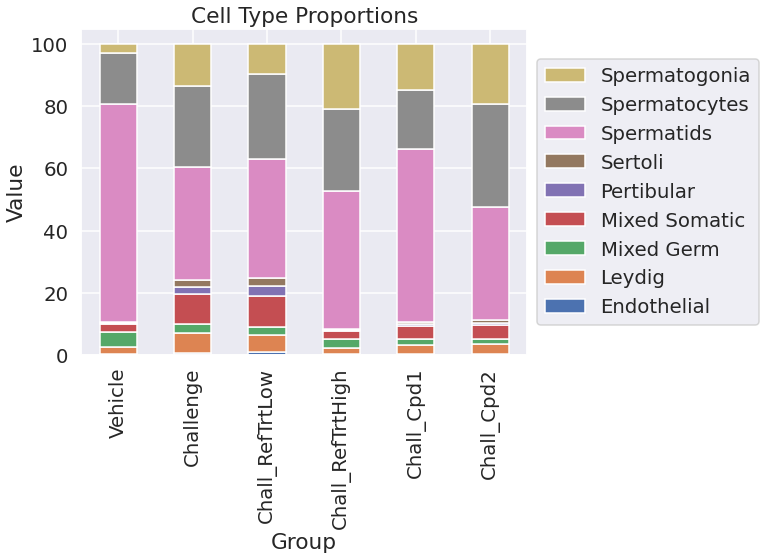

In [35]:
# ------------------
# Stacked Barplot
# ------------------
# Group the data by 'group' and 'category'
grouped = stacked_celltype_percents.groupby(['Group', 'Cell Type'])['Value'].sum().unstack()
grouped = grouped.reindex(meta['Group'].unique())

# Create the stacked barplot
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
#order=list(meta.index)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Group')
ax.set_ylabel('Value')
ax.set_title('Cell Type Proportions')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5)) # Reversed legend order to match barplot
title = ax.title
title.set_position([.5, 1.05]) # More room above figure for title
#plt.subplots_adjust(top=3) # More room above figure for title

# Show the plot
plt.show()

In [36]:
# ------------------
# Stacked Export
# ------------------
# Group the data by 'Group' and 'Cell Type'
grouped = stacked_celltype_percents.groupby(['Group', 'Cell Type'])['Value'].sum().unstack()
grouped = grouped.reindex(meta['Group'].unique())

# Create the stacked barplot
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Group')
ax.set_ylabel('Value')
ax.set_title('Cell Type Proportions')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))

# Export
plt.savefig('CellProportions/celltype_stackedbarplot_v2.pdf', bbox_inches='tight')
plt.close()

In [37]:
# ------------------
# Stacked Export ann0
# ------------------
# Group the data by 'Group' and 'Cell Type'
grouped = stacked_celltype_percents.groupby(['Group', 'Cell Type'])['Value'].sum().unstack()
grouped = grouped.reindex(meta['Group'].unique())

# Create the stacked barplot
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Group')
ax.set_ylabel('Value')
ax.set_title('Cell Type Proportions')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
title = ax.title
title.set_position([.5, 1.05])

# Export
plt.savefig('CellProportions/celltype_stackedbarplot_ann0.pdf', bbox_inches='tight')
plt.close()

## Barcharts for Cell-type Distribution across samples

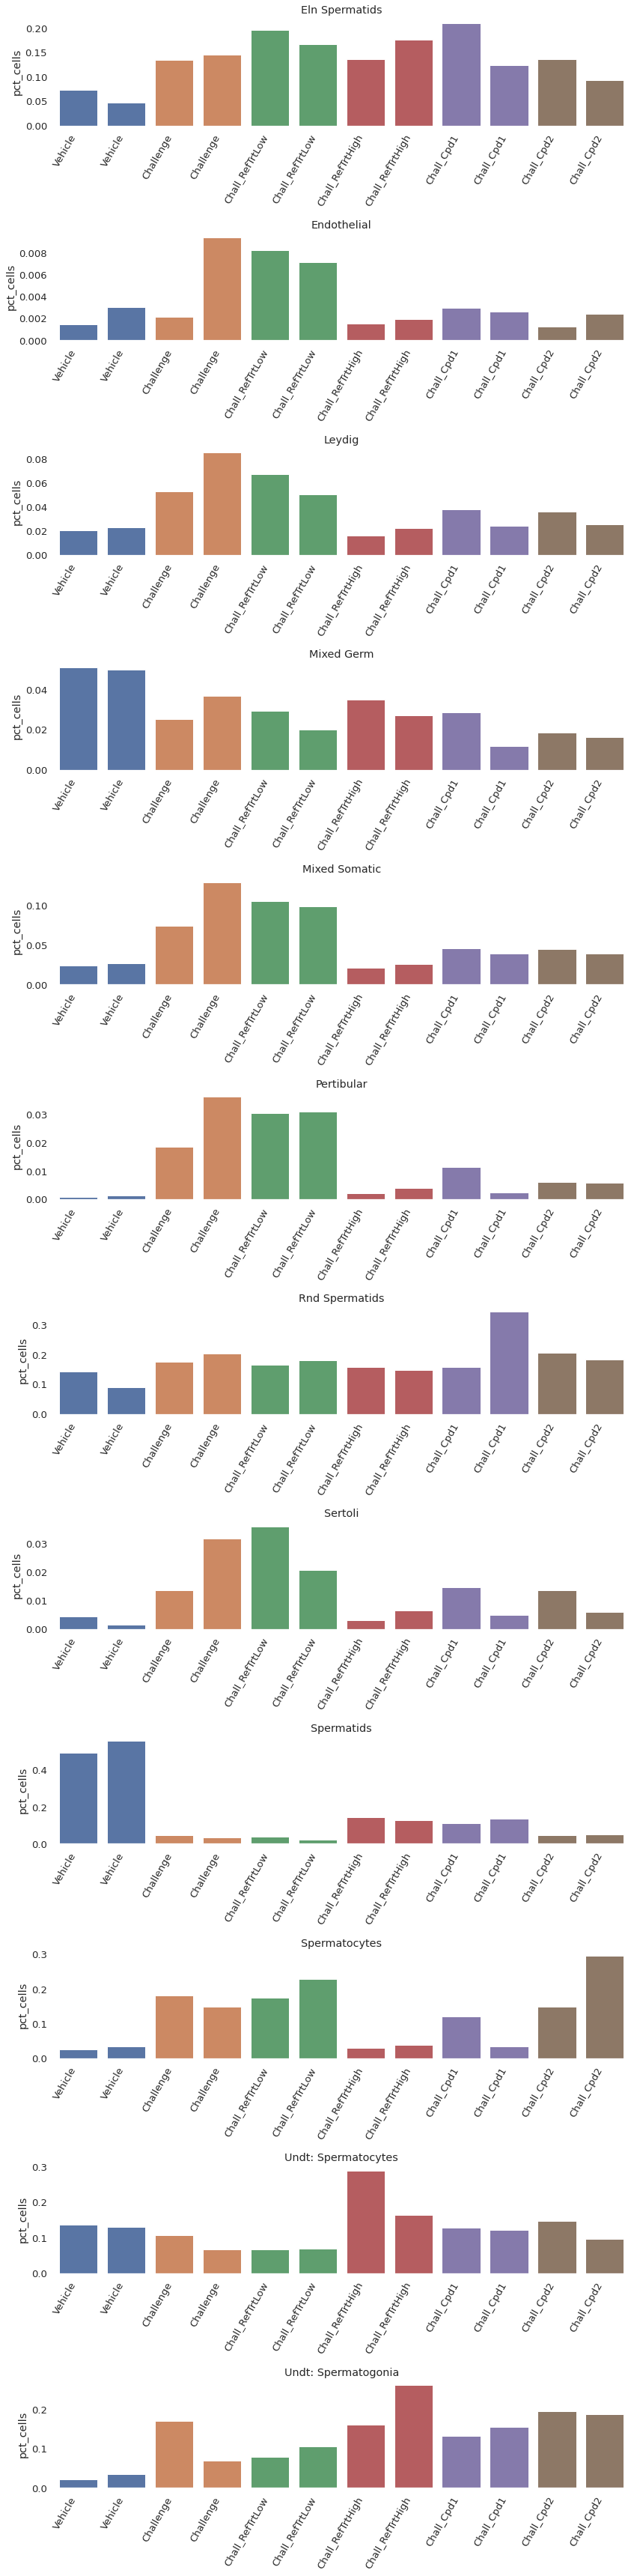

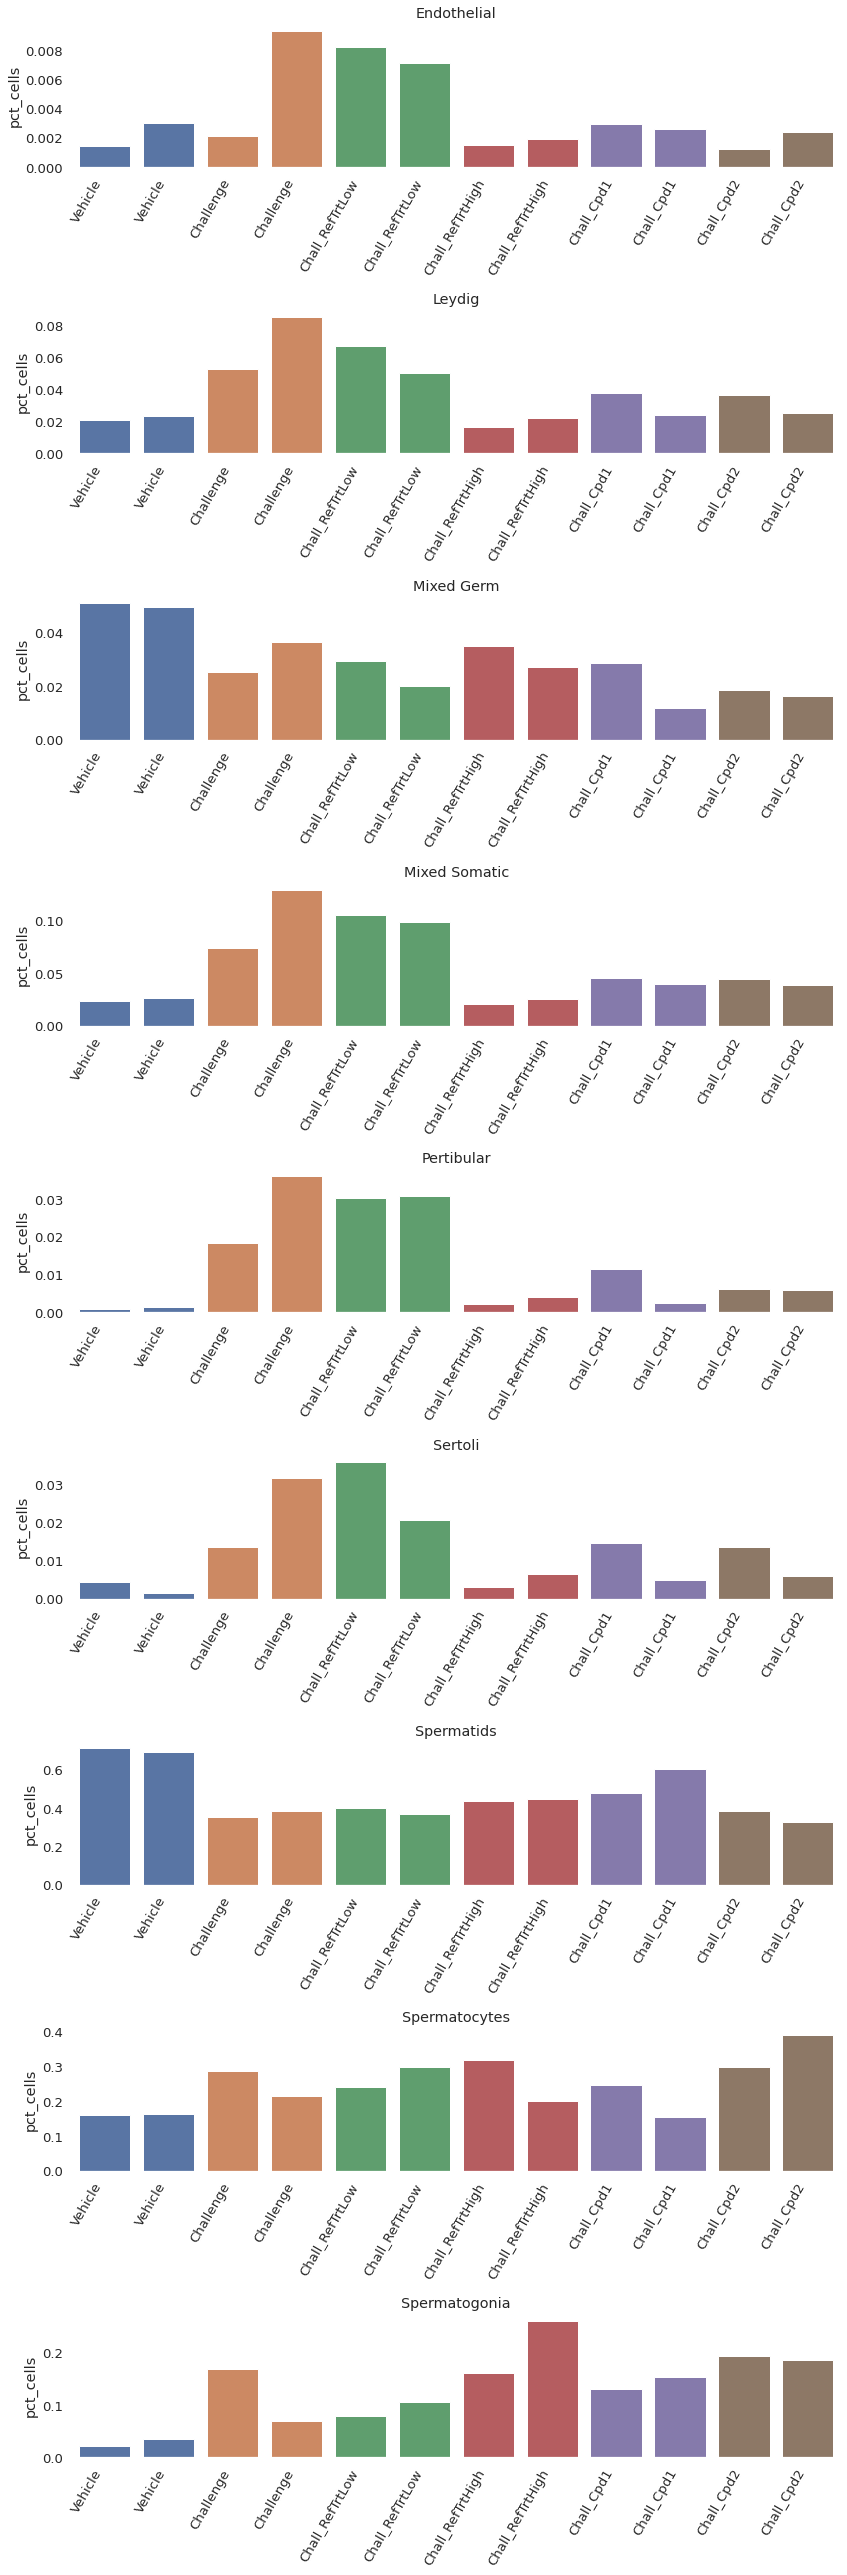

In [38]:
# --------------
# Bar Chart
# --------------
def plotClustDist(adata,prefix,meta,h5cluster = 'leiden'):
    h5sample = 'sample'
    #h5cluster = 'leiden'
    adata.obs[h5cluster] = adata.obs[h5cluster].astype('category')
    clusterList = sorted(adata.obs[h5cluster].unique())
    totalCells = adata.obs[h5sample].value_counts()
    #print(sum(totalCells))

    sns.set(font_scale=1.2)
    fig,axes = plt.subplots(len(clusterList),1,figsize=(12,4*len(clusterList)))
    for n,cluster in enumerate(clusterList):
        cells = adata.obs[adata.obs[h5cluster]==cluster][h5sample].value_counts()
        df = pd.concat([cells,totalCells,meta],join='outer',axis=1).fillna(0)
        df['pct_cells'] = df.apply(lambda x: x[0]/float(x[1]),axis=1)
        #df = df.sort_values(['FSH_dose','hCG_dose'],ascending=True)
        b = sns.barplot(x=df.index,y='pct_cells',hue='Group',data=df,dodge=False,ax=axes[n])
        b.legend_.remove()
        #plt.setp(b.get_legend().get_texts(),fontsize='5')
        axes[n].set_facecolor('white')
        axes[n].set_title(cluster)        
        axes[n].set_xticklabels(meta['Group'],rotation=60,ha='right')
    plt.tight_layout()
    #plt.savefig('%s.Bar.ClusterDistBySample_v2.pdf' % prefix)
    #plt.close()
    plt.show()

plotClustDist(adata=adata,prefix='MouseTestis',meta=meta,h5cluster = 'ann_cluster')
plotClustDist(adata=adata,prefix='MouseTestis_ann0',meta=meta,h5cluster = 'ann_cluster0')

## Violin Plots

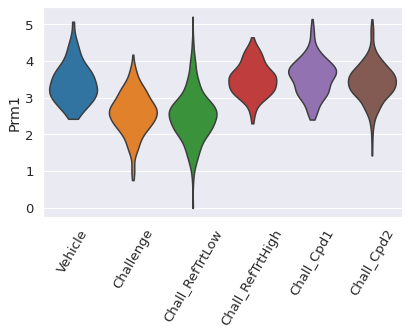

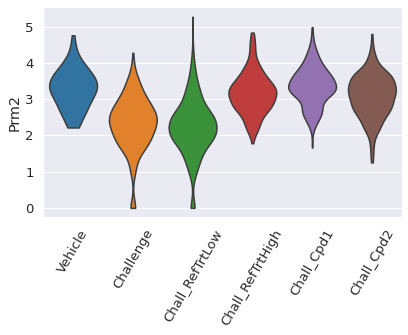

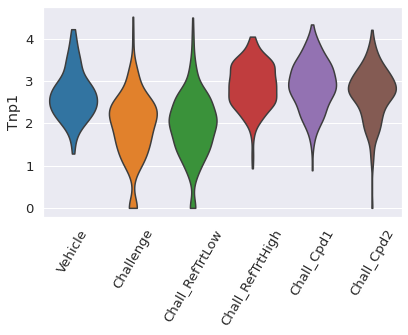

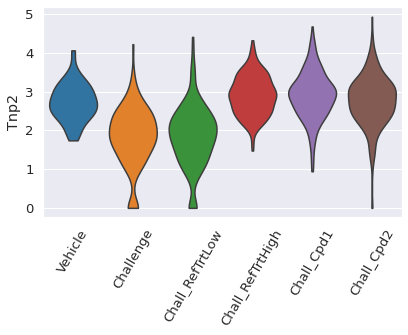

In [42]:
# Standard Violin
def plotViolin2(adata,gene,meta,celltype='',save=False):
    # Sertoli
    adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]
    
    # Colors
    sns.set(font_scale=1.2)
    palette = []
    for color in sns.color_palette('tab10'):
        palette += [color]
    sc.pl.violin(adata,gene,groupby='Group',order=meta['Group'].unique(),
                    stripplot=False,rotation=60,figsize=(4,2),
                    palette=palette,horizontalalignment='right')
        #axes[n].set_title('%s in %s' % (gene, celltype))
        #axes[n].set_xticklabels(axes[n].get_xticklabels(),rotation=45,ha='right')
    
    if save:
        #mpl.use('Agg')
        #mpl.rcParams['figure.figsize'] = [10, 6]
        #mpl.rcParams['figure.autolayout'] = True
        #fig, ax = plt.subplots(figsize=(10, 6))
        #plt.subplots_adjust(bottom=0.2)
        plt.savefig('ViolinPlot/%s/%s.%s.violin.png' % (celltype, celltype, gene), bbox_inches='tight')
        plt.close()
    else:
        plt.tight_layout()
        plt.show()
    
plotViolin2(adata=adata,gene='Prm1',meta=meta,celltype='Sertoli',save=True)
plotViolin2(adata=adata,gene='Prm2',meta=meta,celltype='Sertoli',save=True)
plotViolin2(adata=adata,gene='Tnp1',meta=meta,celltype='Sertoli',save=True)
plotViolin2(adata=adata,gene='Tnp2',meta=meta,celltype='Sertoli',save=True)

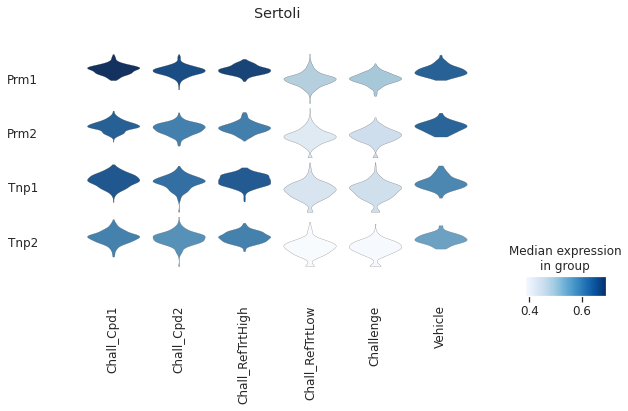

In [40]:
# Stacked Violins
def plotStackedViolin(adata,geneList,meta,celltype=''):
    # Cell Type
    if celltype != '':
        adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]
    # Colors
    sns.set(font_scale=1.2)
    palette = []
    for color in sns.color_palette('tab10'):
        palette += [color]
    
    # Violin
    sc.pl.stacked_violin(adata,geneList,groupby='Group',
                     standard_scale='var',swap_axes=True,figsize=(10,5), title=celltype)
    #title = ax.title
    #title.set_position([.5, 1.05])
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=0,hspace=0)
plotStackedViolin(adata=adata,geneList=['Prm1','Prm2','Tnp1','Tnp2'],meta=meta,celltype='Sertoli')

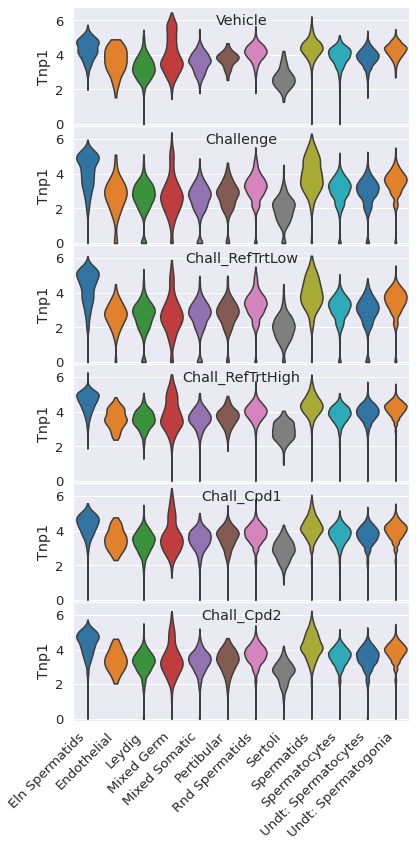

In [45]:
# Group-based Violins
mpl.use('Agg')

def plotGroupViolin(adata,gene,meta):
    # Genes of Interest
    
    # Colors
    sns.set(font_scale=1.2)
    palette = []
    for color in sns.color_palette('tab10'):
        palette += [color]
    
    # Group-specific Violin Plots
    fig,axes = plt.subplots(len(meta['Group'].unique()),1,figsize=(6,2*len(meta['Group'].unique())),sharex=True)
    ylim = 0
    for n,group in enumerate(meta['Group'].unique()):
        gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
        sc.pl.violin(gdata,gene,groupby='ann_cluster',stripplot=False,
                     rotation=60,palette=palette,ax=axes[n])
        # Title
        axes[n].set_title(group)
        axes[n].set_xticklabels(axes[n].get_xticklabels(),rotation=45,ha='right')
        plt.rcParams['axes.titley'] = 0.8
        
        # Set same y axis limit
        ymax = axes[n].get_ylim()[1]
        if ymax > ylim:
            ylim = ymax
        for ax in axes:
            ax.set_ylim(-0.1, ylim)
        
        # Set second y axis label
        #axes[n].set_ylabel('%s' % gene)
        #axes2 = axes[n].twinx()
        #axes2.set_ylabel(group,fontsize=10)
        #axes2.set(yticklabels=[])
        #axes2.tick_params(right=False)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0,hspace=0)
        
plotGroupViolin(adata=adata,gene='Tnp1',meta=meta)

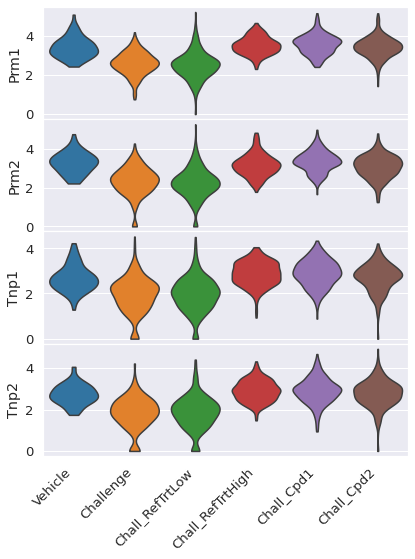

In [47]:
# Custom Stacked Violins
mpl.use('Agg')

def plotStackedViolin2(adata,geneList,meta,celltype=''):
    if celltype != '':
        adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]
    
    # Colors
    sns.set(font_scale=1.2)
    palette = []
    for color in sns.color_palette('tab10'):
        palette += [color]
    
    # Group-specific Violin Plots
    fig,axes = plt.subplots(len(geneList),1,figsize=(6,2*len(geneList)),sharex=True)
    #ylim = 0
    for n,gene in enumerate(geneList):
        sc.pl.violin(adata,gene,groupby='Group',order=meta['Group'].unique(),stripplot=False,
                     rotation=60,palette=palette,ax=axes[n])
        # Title
        #axes[n].set_title(gene)
        axes[n].set_xticklabels(axes[n].get_xticklabels(),rotation=45,ha='right')
        plt.rcParams['axes.titley'] = 0.8
        
        # Set same y axis limit
        #ymax = axes[n].get_ylim()[1]
        #if ymax > ylim:
            #ylim = ymax
        #for ax in axes:
            #ax.set_ylim(-0.1, ylim)
        
        # Set second y axis label
        #axes[n].set_ylabel('%s' % gene)
        #axes2 = axes[n].twinx()
        #axes2.set_ylabel(group,fontsize=10)
        #axes2.set(yticklabels=[])
        #axes2.tick_params(right=False)
        plt.tight_layout()
        plt.subplots_adjust(wspace=0,hspace=0)
        
plotStackedViolin2(adata=adata,geneList=['Prm1','Prm2','Tnp1','Tnp2'],meta=meta,celltype='Sertoli')

## Extra

/tmp/ipykernel_117507/2345456769.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])


ranking genes
    finished: added to `.uns['Sertoli']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


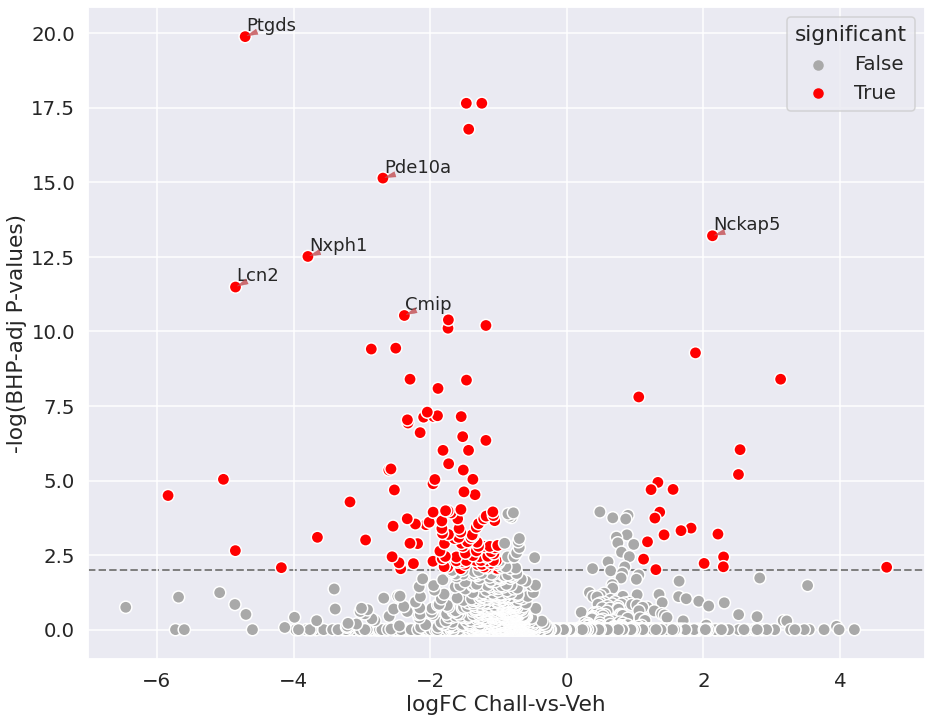

In [56]:
# Volcanoplot (incomplete)
def plotTreatmentDEgenes(adata,meta,celltype,control,treatment,prefix):
    if not 'base' in adata.uns['log1p']:
        adata.uns['log1p']['base'] = None
    
    # Subsetting for Cell Type
    adata = adata[adata.obs.loc[adata.obs.ann_cluster.isin([celltype])].index.tolist(), ]

    adata.obs['Group'] = adata.obs['sample'].map(meta['Group'])        
    comparison = treatment + '_vs_' + control
    sc.tl.rank_genes_groups(adata,'Group',groups=[treatment],reference=control,method='wilcoxon',pts=False,key_added=celltype)

    index = list(map(lambda x: x[0],adata.uns[celltype]['names']))
    logfc = pd.Series(map(lambda x: x[0],adata.uns[celltype]['logfoldchanges']),index=index,name='logFC')
    pv = pd.Series(map(lambda x: x[0],adata.uns[celltype]['pvals_adj']),index=index,name='pvals_adj')
    markers = pd.concat([logfc,pv],join='inner',axis=1)
    pcts = pd.read_csv('DEA/%s/%s.scanpy.%s.marker.pts.csv' % (celltype,prefix,celltype),index_col=0)
    #only keep genes that are expressed in >10% of the cells in either condition
    geneList = list(pcts[(pcts[control]>.1) | (pcts[treatment]>.1)].index)
    markers = markers.loc[map(lambda x: x in geneList,markers.index),:]
    from pybiomart import Dataset
    dataset = Dataset(name='mmusculus_gene_ensembl',host='http://www.ensembl.org')
    names = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])
    names.index = names['Gene name']
    names = names[~names.index.duplicated()]
    markers = pd.concat([markers,names.drop('Gene name',axis=1)],join='inner',axis=1)
    markers['-logP'] = markers.apply(lambda x: -np.log10(x['pvals_adj']) if x['pvals_adj']>0 else 320,axis=1)
    markers['significant'] = markers.apply(lambda x: x['-logP']>2 and abs(x['logFC'])>1,axis=1)
    markers.drop('-logP',axis=1).to_csv('scanpy.%s.DE.%s.csv' % (celltype,comparison))
    markers = markers[(markers['logFC']>-10) & (markers['logFC']<10)]
    sig = markers[(markers['-logP']>10) & ((markers['logFC']>2) | (markers['logFC']<-2))]
    #sig = markers[(markers['-logP']>100) & ((markers['logFC']>2) | (markers['logFC']<-2))]
    
    from adjustText import adjust_text
    xlabel = 'logFC %s' % prefix
    ylabel = '-log(BHP-adj P-values)'
    sns.set(font_scale=1.2,context='talk')
    fig,ax = plt.subplots(figsize=(15,12))
    sns.scatterplot(x='logFC',y='-logP',hue='significant',data=markers,s=150,linewidth=1.5,palette=['darkgrey','red'],ax=ax)
    ax.axline((0,2),slope=0,color='gray',ls='--',lw=2,zorder=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    texts = []
    for label,x,y in zip(sig.index,sig['logFC'],sig['-logP']):
        texts.append(plt.text(x,y,label,ha='center',size=18))
        #plt.annotate(label,xy=(x,y),xytext=(2,0),textcoords='offset points',ha='left',va='center')
    adjust_text(texts,autoalign='xy',arrowprops=dict(arrowstyle="simple, head_width=0.25, tail_width=0.05", color='r', lw=0.5, alpha=0.8))

    #plt.savefig('scanpy.%s.volcano.%s.png' % (celltype,comparison))
    #plt.close()

plotTreatmentDEgenes(adata,meta,celltype='Sertoli',control='Vehicle',treatment='Challenge',prefix='Chall-vs-Veh')

#### Sample Specific UMAPs

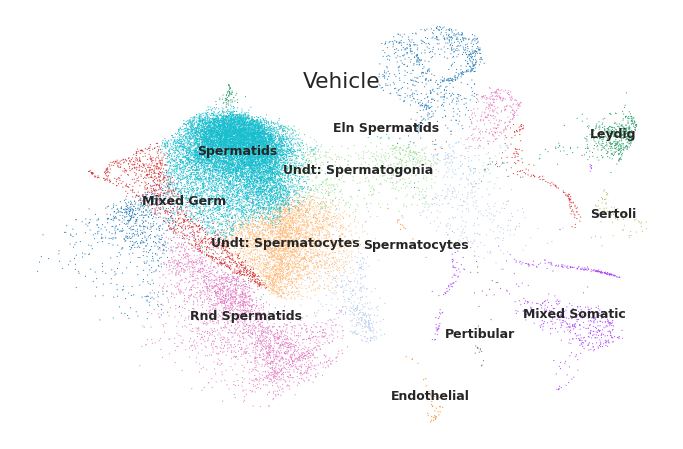

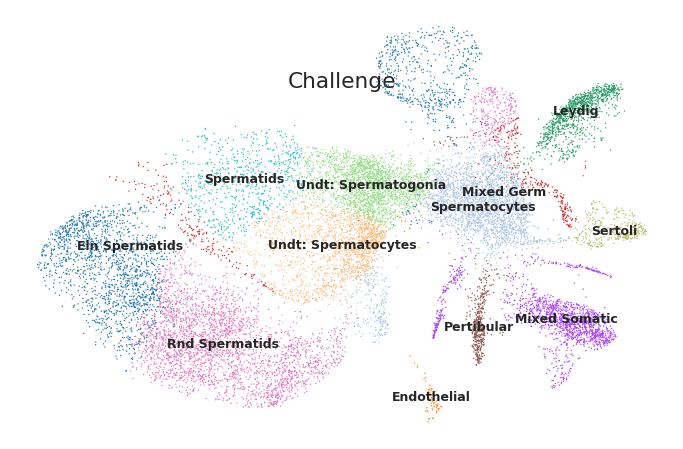

In [65]:
# Group Umaps
def GroupUmap(adata):
    #for group in adata.obs['Group'].unique():
    for group in ['Vehicle','Challenge']:
        gdata = adata[adata.obs.loc[adata.obs.Group.isin([group])].index.tolist(), ]
        sc.pl.umap(gdata,color='ann_cluster',frameon=False,legend_loc='on data',title=group,legend_fontsize='xx-small')
        
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (12, 8)}):
    GroupUmap(adata=adata)